## Exploratory Data Analysis (Task 2 -)

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv("E:/KAIM 2/KAIM 2 Week 6/Week-6/data/cleaned_credit_data.csv")

In [3]:
# 1. Overview of the Data
print("1. Overview of the Data:")
print(df.info())
print("\nSample of the data:")
print(df.head())

1. Overview of the Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  

In [4]:
# 2. Summary Statistics
print("\n2. Summary Statistics:")
print(df.describe())



2. Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000



3. Distribution of Numerical Features:


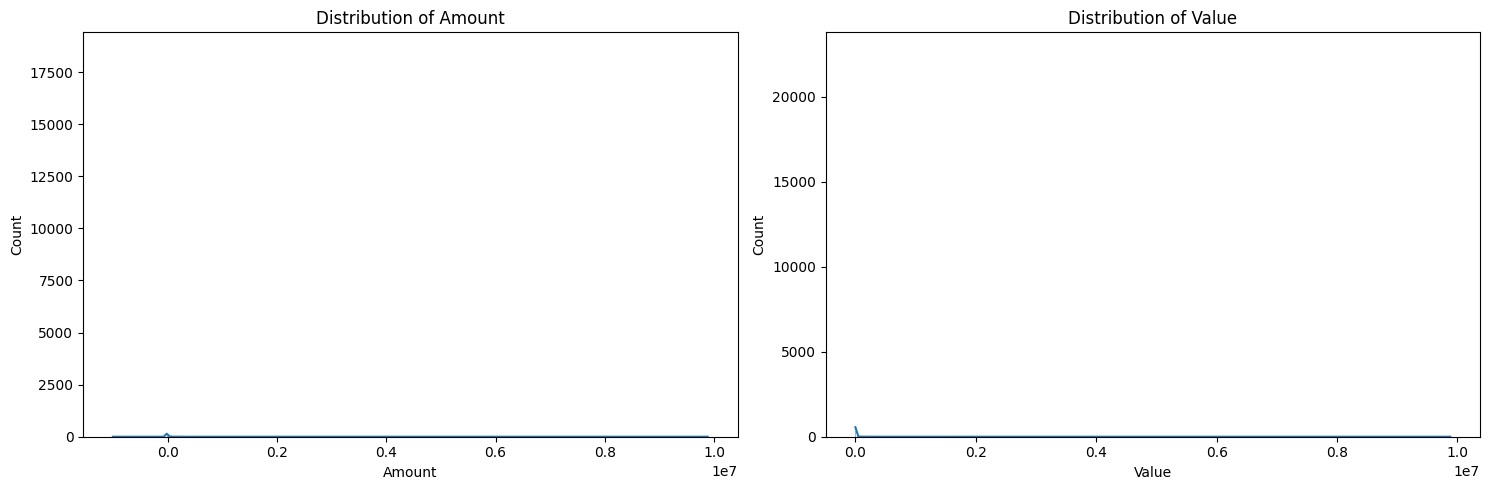

In [5]:
# 3. Distribution of Numerical Features
print("\n3. Distribution of Numerical Features:")
numerical_features = ['Amount', 'Value']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


4. Distribution of Categorical Features:


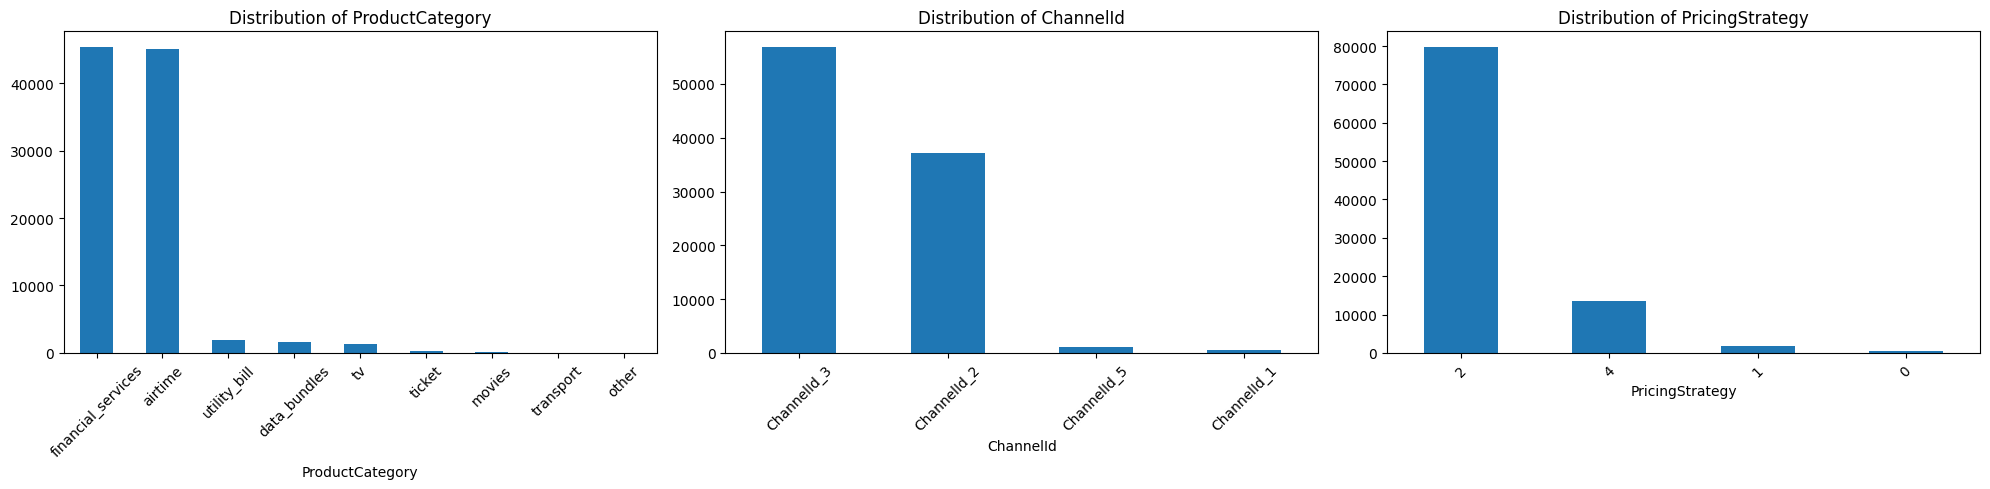

In [6]:
# 4. Distribution of Categorical Features
print("\n4. Distribution of Categorical Features:")
categorical_features = ['ProductCategory', 'ChannelId', 'PricingStrategy']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


5. Correlation Analysis:


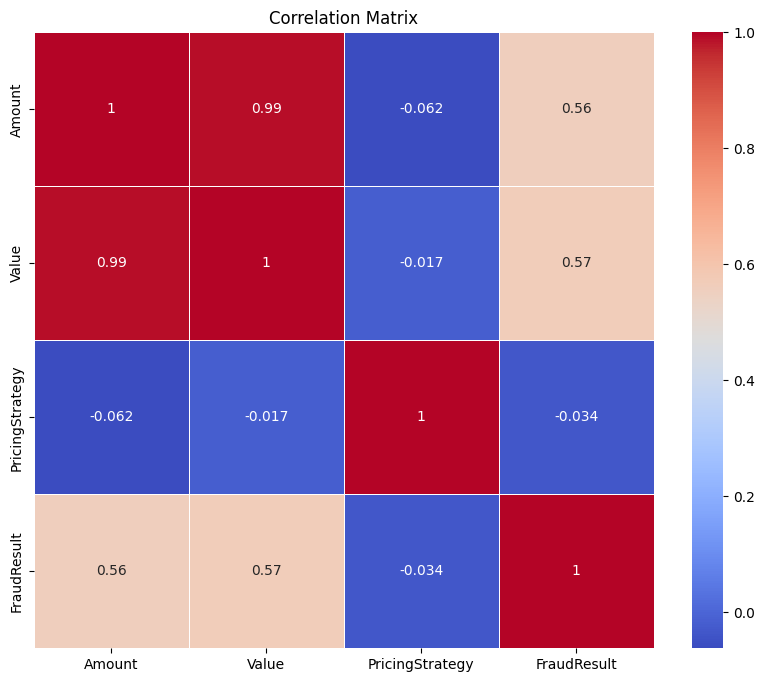

In [7]:
# 5. Correlation Analysis
print("\n5. Correlation Analysis:")
correlation_matrix = df[numerical_features + ['PricingStrategy', 'FraudResult']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# 6. Identifying Missing Values
print("\n6. Identifying Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


6. Identifying Missing Values:
Series([], dtype: int64)



7. Outlier Detection:


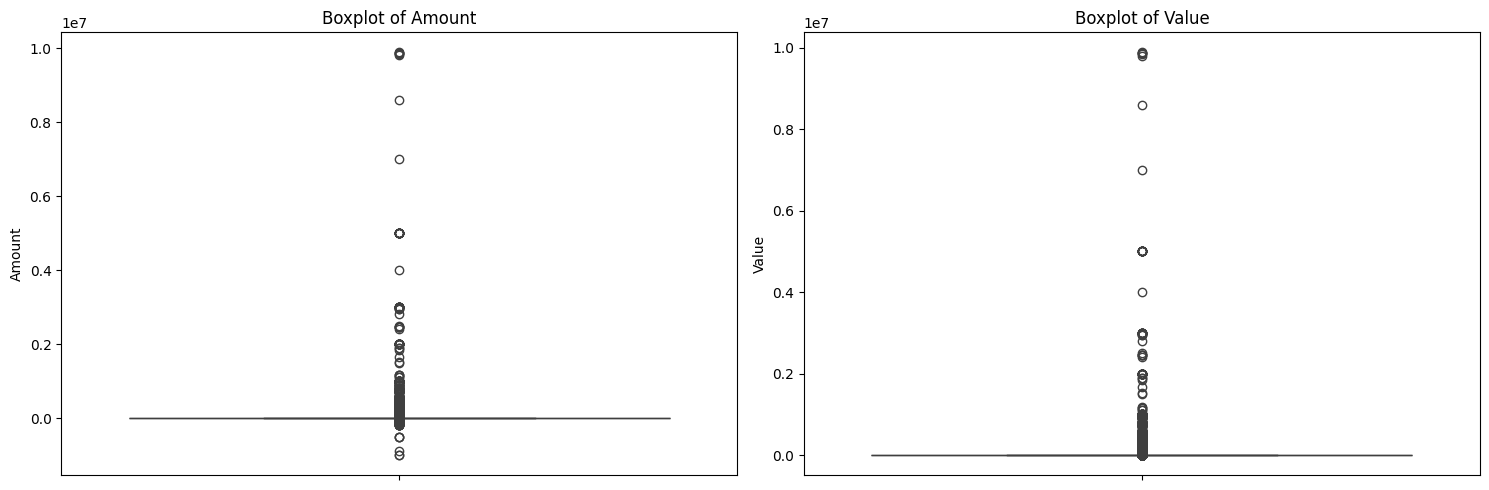

In [9]:
# 7. Outlier Detection
print("\n7. Outlier Detection:")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [10]:
# Additional analysis: Transaction counts over time
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['Date'] = df['TransactionStartTime'].dt.date
transaction_counts = df.groupby('Date').size()

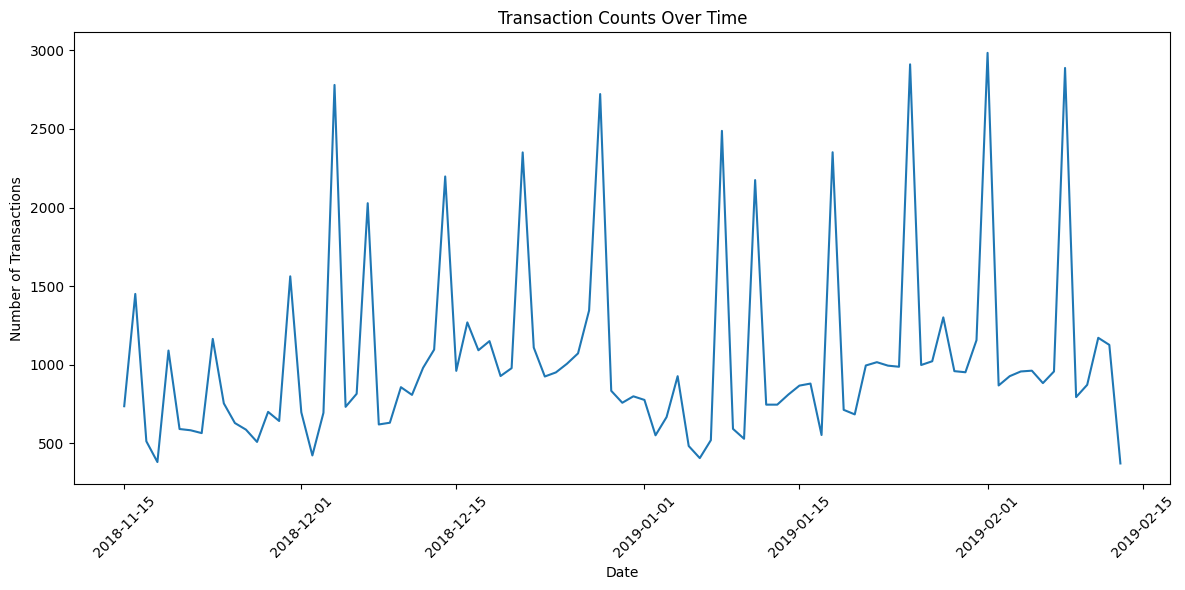

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(transaction_counts.index, transaction_counts.values)
plt.title('Transaction Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Observations:

The dataset contains 50 rows and 16 columns, with no missing values.
'Amount' and 'Value' are the main numerical features, while others like 'ProductCategory' and 'ChannelId' are categorical.
The distribution of 'Amount' and 'Value' might be right-skewed, indicating some high-value transactions.
There are multiple product categories, channels, and pricing strategies.
There seems to be a strong correlation between 'Amount' and 'Value'.
No missing values were found in the dataset.
There appear to be some outliers in both 'Amount' and 'Value', particularly on the higher end.
The transaction count over time might reveal patterns in customer behavior.

These insights provide a good starting point for further analysis and feature engineering for your credit scoring model. You might want to consider:

Analyzing the relationship between transaction characteristics and the likelihood of fraud.
Investigating how different product categories or channels relate to transaction amounts.
Exploring how pricing strategies affect transaction patterns.
Considering time-based features, such as transaction frequency or total amount per customer over time.